In [1]:
# Import Dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import hvplot.pandas


### Coral Dataset

In [2]:
# Create Dataframe 
try:
    coral_df = pd.read_csv("corals_worldwide_dataset.csv")
except FileNotFoundError:
    print("File not found. Please check the path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")

print("Rows in Dataframe: ", len(coral_df))
coral_df

Rows in Dataframe:  2451


name   salinity  January_temp  June_temp    area  latitude  \
0     Adriatic Sea  38.298527     15.658799  20.855299  138000        43   
1     Adriatic Sea  38.304909     16.297098  19.501200  138000        43   
2     Adriatic Sea  38.462040     16.251598  19.028500  138000        43   
3     Adriatic Sea  38.121601     15.709500  22.882999  138000        43   
4     Adriatic Sea  38.519196     15.733400  21.824799  138000        43   
...            ...        ...           ...        ...     ...       ...   
2446    Yellow Sea  31.611076      8.349999  19.500000  380000        38   
2447    Yellow Sea  31.468084      8.441801  19.800000  380000        38   
2448    Yellow Sea  31.600788      8.432699  20.700000  380000        38   
2449    Yellow Sea  31.533226      8.102799  19.000000  380000        38   
2450    Yellow Sea  30.992769      7.899599  20.700000  380000        38   

      longitude  type of sea  corals  silt/sulfide  
0            15            2       1             0  
1            15            2       1             0  
2            15            2       1             0  
3            15            2       1             0  
4            15            2       1             0  
...         ...          ...     ...           ...  
2446        123            3       0             1  
2447        123            3       0             1  
2448        123            3       0             1  
2449        123            3       0             1  
2450        123            3       0             1  

[2451 rows x 10 columns]

In [3]:
# Review dataset columns
coral_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2451 entries, 0 to 2450
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2451 non-null   object 
 1   salinity      2451 non-null   float64
 2   January_temp  2451 non-null   float64
 3   June_temp     2451 non-null   float64
 4   area          2451 non-null   int64  
 5   latitude      2451 non-null   int64  
 6   longitude     2451 non-null   int64  
 7   type of sea   2451 non-null   int64  
 8   corals        2451 non-null   int64  
 9   silt/sulfide  2451 non-null   int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 191.6+ KB


In [4]:
# Review basic information on dataset
coral_df.describe()

salinity  January_temp    June_temp          area     latitude  \
count  2451.000000   2451.000000  2451.000000  2.451000e+03  2451.000000   
mean     32.819880     18.026784    21.612658  1.004778e+06    17.804978   
std       6.625290     11.069937    10.095466  1.207755e+06    33.877142   
min       5.933204     -1.899994    -1.899994  1.150000e+04   -68.000000   
25%      32.870247      7.942601    19.500600  2.800000e+05    -5.000000   
50%      34.191502     19.670200    24.600000  6.100000e+05    20.000000   
75%      36.148840     28.238198    29.620199  1.150000e+06    40.000000   
max      40.000000     30.763500    32.300000  5.695000e+06    76.000000   

         longitude  type of sea       corals  silt/sulfide  
count  2451.000000  2451.000000  2451.000000   2451.000000  
mean     77.937169     2.680131     0.860057      0.039984  
std      53.367369     0.507584     0.346999      0.195961  
min       0.000000     1.000000     0.000000      0.000000  
25%      28.000000     2.000000     1.000000      0.000000  
50%      65.000000     3.000000     1.000000      0.000000  
75%     125.000000     3.000000     1.000000      0.000000  
max     163.000000     3.000000     1.000000      1.000000

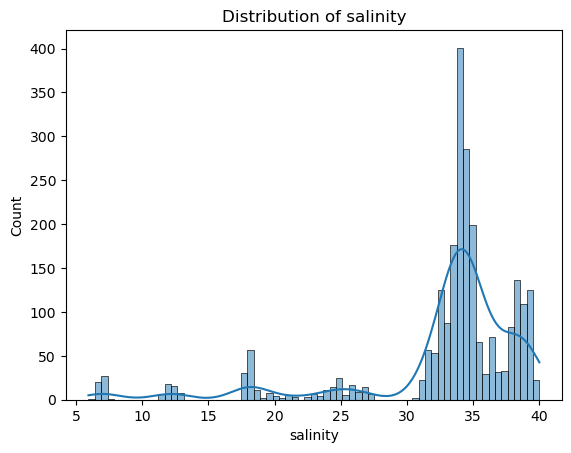

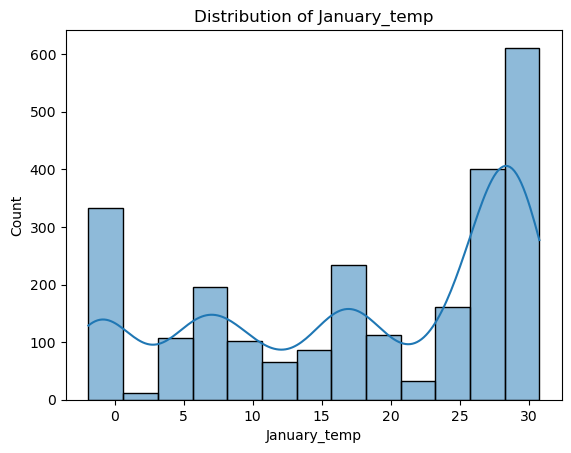

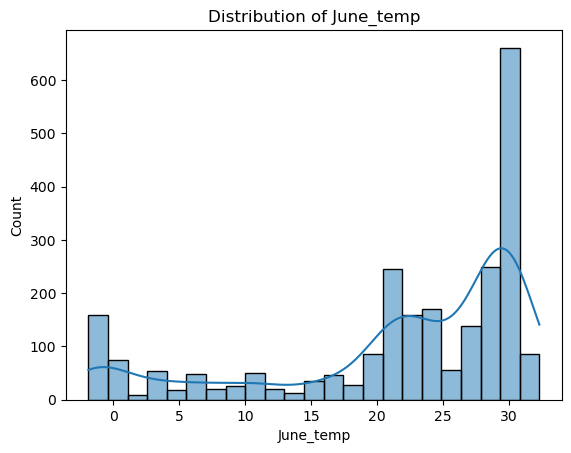

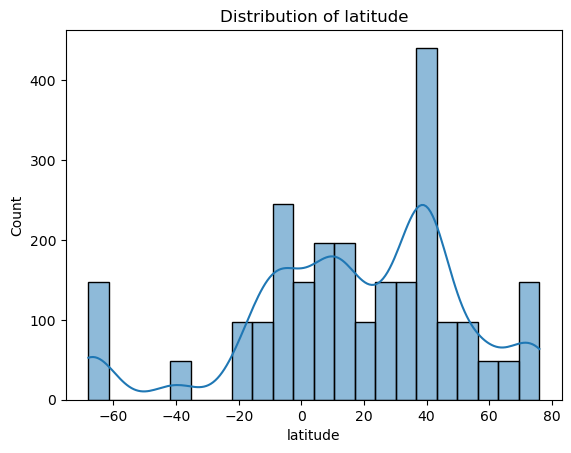

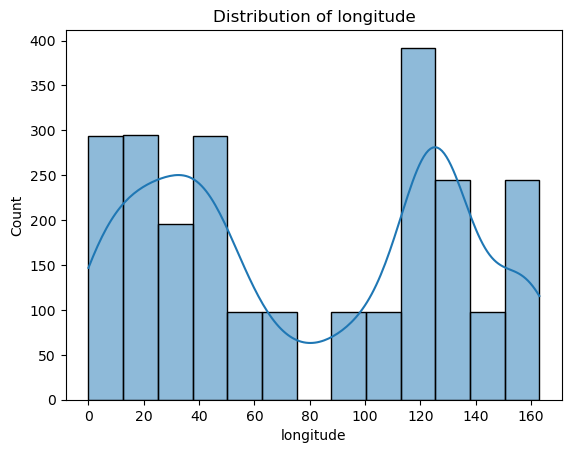

In [5]:
# Exploratory Data Analysis (EDA)
# Visualizing the distribution of features
features_to_visualize = ["salinity", "January_temp", "June_temp", "latitude", "longitude"]

for feature in features_to_visualize:
    sns.histplot(coral_df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

In [41]:
seas_avg_df = coral_df.groupby('name').mean()
seas_avg_df

salinity  January_temp  June_temp       area  latitude  \
name                                                                           
Adriatic Sea         38.303255     13.028104  22.846738   138000.0      43.0   
Aegean Sea           38.237870     15.903459  22.376637   214000.0      39.0   
Andaman Sea          32.285375     26.426148  29.892895   797700.0      10.0   
Arabian Sea          36.283521     26.713625  29.835911  3862000.0      14.0   
Arafura Sea          34.083098     29.203869  28.802617   650000.0      -9.0   
Balearic Sea         37.720355     15.294423  22.092803   150000.0      40.0   
Baltic Sea            6.966995      5.033735  11.391209   377000.0      58.0   
Banda Sea            34.026195     29.101985  29.128098   695000.0      -6.0   
Barents Sea          34.520745      0.348159   0.845943  1400000.0      75.0   
Bay of Bengal        32.733166     27.542068  29.870546  2172000.0      15.0   
Black Sea            18.248129      8.003221  21.680940   436000.0      44.0   
Caspian Sea          12.197338      7.213342  22.881633   371000.0      42.0   
Celebes Sea          33.848859     29.347997  30.119678   280000.0       3.0   
Coral Sea            34.964345     28.557429  26.337411  4791000.0     -18.0   
Cosmonauts Sea       33.961759     -0.280915  -1.355504   699000.0     -65.0   
East China Sea       32.845126     16.213370  21.243605  1249000.0      30.0   
East Siberian Sea    23.953027     -1.899994   4.838776   987000.0      72.0   
Flores Sea           33.744480     28.671498  29.542042   240000.0      -8.0   
Gulf of Aden         36.266838     26.083673  30.463265   410000.0      12.0   
Gulf of Carpentaria  34.261650     30.310489  27.660064   300000.0     -14.0   
Gulf of Guinea       34.871333     28.235648  27.323297  2350000.0       0.0   
Gulf of Thailand     32.005459     28.053971  30.208467   320000.0       9.0   
Ionian Sea           38.721667     16.863679  22.244456   169000.0      38.0   
Java Sea             32.768972     29.320930  29.911515   320000.0      -5.0   
Laccadive Sea        34.595046     28.437505  29.036101   786000.0       8.0   
Laptev Sea           23.527834     -1.899994   0.745273   662000.0      76.0   
Lazarev Sea          34.169057     -0.967955  -1.655098   929000.0     -68.0   
Levantine Sea        39.264748     19.592960  23.628676   320000.0      34.0   
Libyan Sea           39.069950     17.975279  21.668915   350000.0      34.0   
Mediterranean Sea    38.410080     17.991789  22.612581  2510000.0      35.0   
Molucca Sea          33.911385     29.835368  29.735009   200000.0       0.0   
Mozambique Channel   35.061846     29.389488  26.513748   700000.0     -18.0   
North Sea            34.317726      8.086532  11.470423   575000.0      56.0   
Norwegian Sea        35.046983      5.982094   7.421810  1383000.0      69.0   
Oman Sea             37.010616     24.653146  31.528895   181000.0      25.0   
Persian Gulf         39.289902     23.031055  29.701734   251000.0      26.0   
Philippine Sea       34.488604     25.801036  29.998115  5695000.0      20.0   
Red Sea              39.217521     26.602558  29.237374   438000.0      22.0   
Riiser-Larsen Sea    33.884373     -0.471300  -1.899994  1138000.0     -68.0   
Sea of Azov          17.896379      5.145174  20.641311    39000.0      46.0   
Sea of Japan         33.879046      7.969377  18.585857  1050000.0      40.0   
Sea of Marmara       26.781580     11.196847  22.724626    11500.0      40.0   
Sea of Okhotsk       32.669642      0.060737   3.906253  1583000.0      55.0   
Solomon Sea          34.559517     30.451540  29.607191   720000.0      -8.0   
Somov Sea            33.945116     -1.852533  -1.899994  1150000.0     -67.0   
South China Sea      33.315677     27.167469  29.953932  3500000.0      12.0   
Sulu Sea             33.662841     28.146270  30.176650   260000.0       8.0   
Tasman Sea           35.446093     22.078388  16.230417  2300000.0     -40.0   
Timor Sea            3

In [42]:
seas_map = seas_avg_df.hvplot.points(
    "longitude",
    "latitude",
    hover_cols = ["name", "salinity", "January_temp", "June_temp"],
    color="corals",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500   
)

seas_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (corals,name,salinity,January_temp,June_temp)

In [6]:
# Preprocessing: Scaling the data
try:
    data_scaled = StandardScaler().fit_transform(coral_df[features_to_visualize])
    df_coral_scaled = pd.DataFrame(data_scaled, columns=features_to_visualize)
except ValueError as ve:
    print(f"Value error: {ve}")
except Exception as e:
    print(f"An error occurred: {e}")

### Scale Data

In [7]:
# Scale numerical data within dataframe using StandardScaler
data_scaled = StandardScaler().fit_transform(
    coral_df[["salinity", "January_temp", "June_temp", "area", "latitude", "longitude"]]
)
data_scaled[:5]

array([[ 0.8270981 , -0.21395497, -0.07503504, -0.71782363,  0.74386924,
        -1.17955996],
       [ 0.82806157, -0.15628262, -0.20919185, -0.71782363,  0.74386924,
        -1.17955996],
       [ 0.85178329, -0.16039367, -0.25602442, -0.71782363,  0.74386924,
        -1.17955996],
       [ 0.80038805, -0.20937396,  0.12585853, -0.71782363,  0.74386924,
        -1.17955996],
       [ 0.86041193, -0.20721451,  0.02101773, -0.71782363,  0.74386924,
        -1.17955996]])

In [8]:
# Put scaled data into new dataframe
df_coral_scaled = pd.DataFrame(data_scaled, columns=["salinity", "January_temp", "June_temp", "area", "latitude", "longitude"])
df_coral_scaled.head()


salinity  January_temp  June_temp      area  latitude  longitude
0  0.827098     -0.213955  -0.075035 -0.717824  0.743869   -1.17956
1  0.828062     -0.156283  -0.209192 -0.717824  0.743869   -1.17956
2  0.851783     -0.160394  -0.256024 -0.717824  0.743869   -1.17956
3  0.800388     -0.209374   0.125859 -0.717824  0.743869   -1.17956
4  0.860412     -0.207215   0.021018 -0.717824  0.743869   -1.17956

In [9]:
# Review categorical columns
dummies = coral_df[["type of sea", "corals", "silt/sulfide"]]
dummies

type of sea  corals  silt/sulfide
0               2       1             0
1               2       1             0
2               2       1             0
3               2       1             0
4               2       1             0
...           ...     ...           ...
2446            3       0             1
2447            3       0             1
2448            3       0             1
2449            3       0             1
2450            3       0             1

[2451 rows x 3 columns]

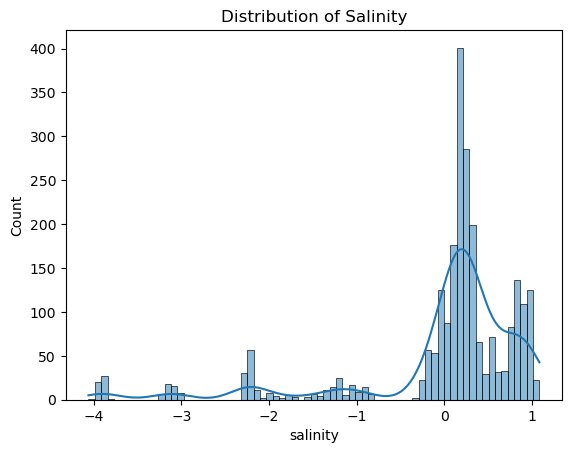

In [10]:
# EDA on the New Data
# Visualizing the distribution of 'salinity' (Repeat for other features)
sns.histplot(df_coral_scaled['salinity'], kde=True)
plt.title("Distribution of Salinity")
plt.show()

In [11]:
# Consolidate scaled numerical data and categorical data into one dataframe
df_coral_scaled = pd.concat([df_coral_scaled, dummies], axis=1)
df_coral_scaled.head()

salinity  January_temp  June_temp      area  latitude  longitude  \
0  0.827098     -0.213955  -0.075035 -0.717824  0.743869   -1.17956   
1  0.828062     -0.156283  -0.209192 -0.717824  0.743869   -1.17956   
2  0.851783     -0.160394  -0.256024 -0.717824  0.743869   -1.17956   
3  0.800388     -0.209374   0.125859 -0.717824  0.743869   -1.17956   
4  0.860412     -0.207215   0.021018 -0.717824  0.743869   -1.17956   

   type of sea  corals  silt/sulfide  
0            2       1             0  
1            2       1             0  
2            2       1             0  
3            2       1             0  
4            2       1             0

### Clustering with Original Data

In [12]:
# Determine best value for k using a for loop
k = list(range(1, 11))
inertia = []
for i in k:
    model = KMeans(n_clusters=i, random_state=1)
    model.fit(df_coral_scaled)
    inertia.append(model.inertia_)

In [13]:
# Put k values and calculated inertia into new dataframe
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df.head()

k       inertia
0  1  15726.303550
1  2  11023.192193
2  3   8765.448985
3  4   6673.852007
4  5   5130.681246

In [14]:
# Plotting Elbow Curve to determine optimal number of clusters
elbow_plot_orig = elbow_df.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k
)
elbow_plot_orig

:Curve   [k]   (inertia)

In [15]:
# Create model based on ideal number of clusters
# Use 6 clusters based on elbow curve graph
model = KMeans(n_clusters=6, random_state=1)
model.fit(df_coral_scaled)

KMeans(n_clusters=6, random_state=1)

In [16]:
# Determine cluster number for each data point
k_6 = model.predict(df_coral_scaled)
k_6

array([0, 0, 0, ..., 3, 3, 3])

In [17]:
# Create copy of scaled dataframe to store predictions
df_coral_scaled_predictions = df_coral_scaled.copy()

In [18]:
# Add cluster numbers to dataframe
df_coral_scaled_predictions["cluster"] = k_6
df_coral_scaled_predictions.head()

salinity  January_temp  June_temp      area  latitude  longitude  \
0  0.827098     -0.213955  -0.075035 -0.717824  0.743869   -1.17956   
1  0.828062     -0.156283  -0.209192 -0.717824  0.743869   -1.17956   
2  0.851783     -0.160394  -0.256024 -0.717824  0.743869   -1.17956   
3  0.800388     -0.209374   0.125859 -0.717824  0.743869   -1.17956   
4  0.860412     -0.207215   0.021018 -0.717824  0.743869   -1.17956   

   type of sea  corals  silt/sulfide  cluster  
0            2       1             0        0  
1            2       1             0        0  
2            2       1             0        0  
3            2       1             0        0  
4            2       1             0        0

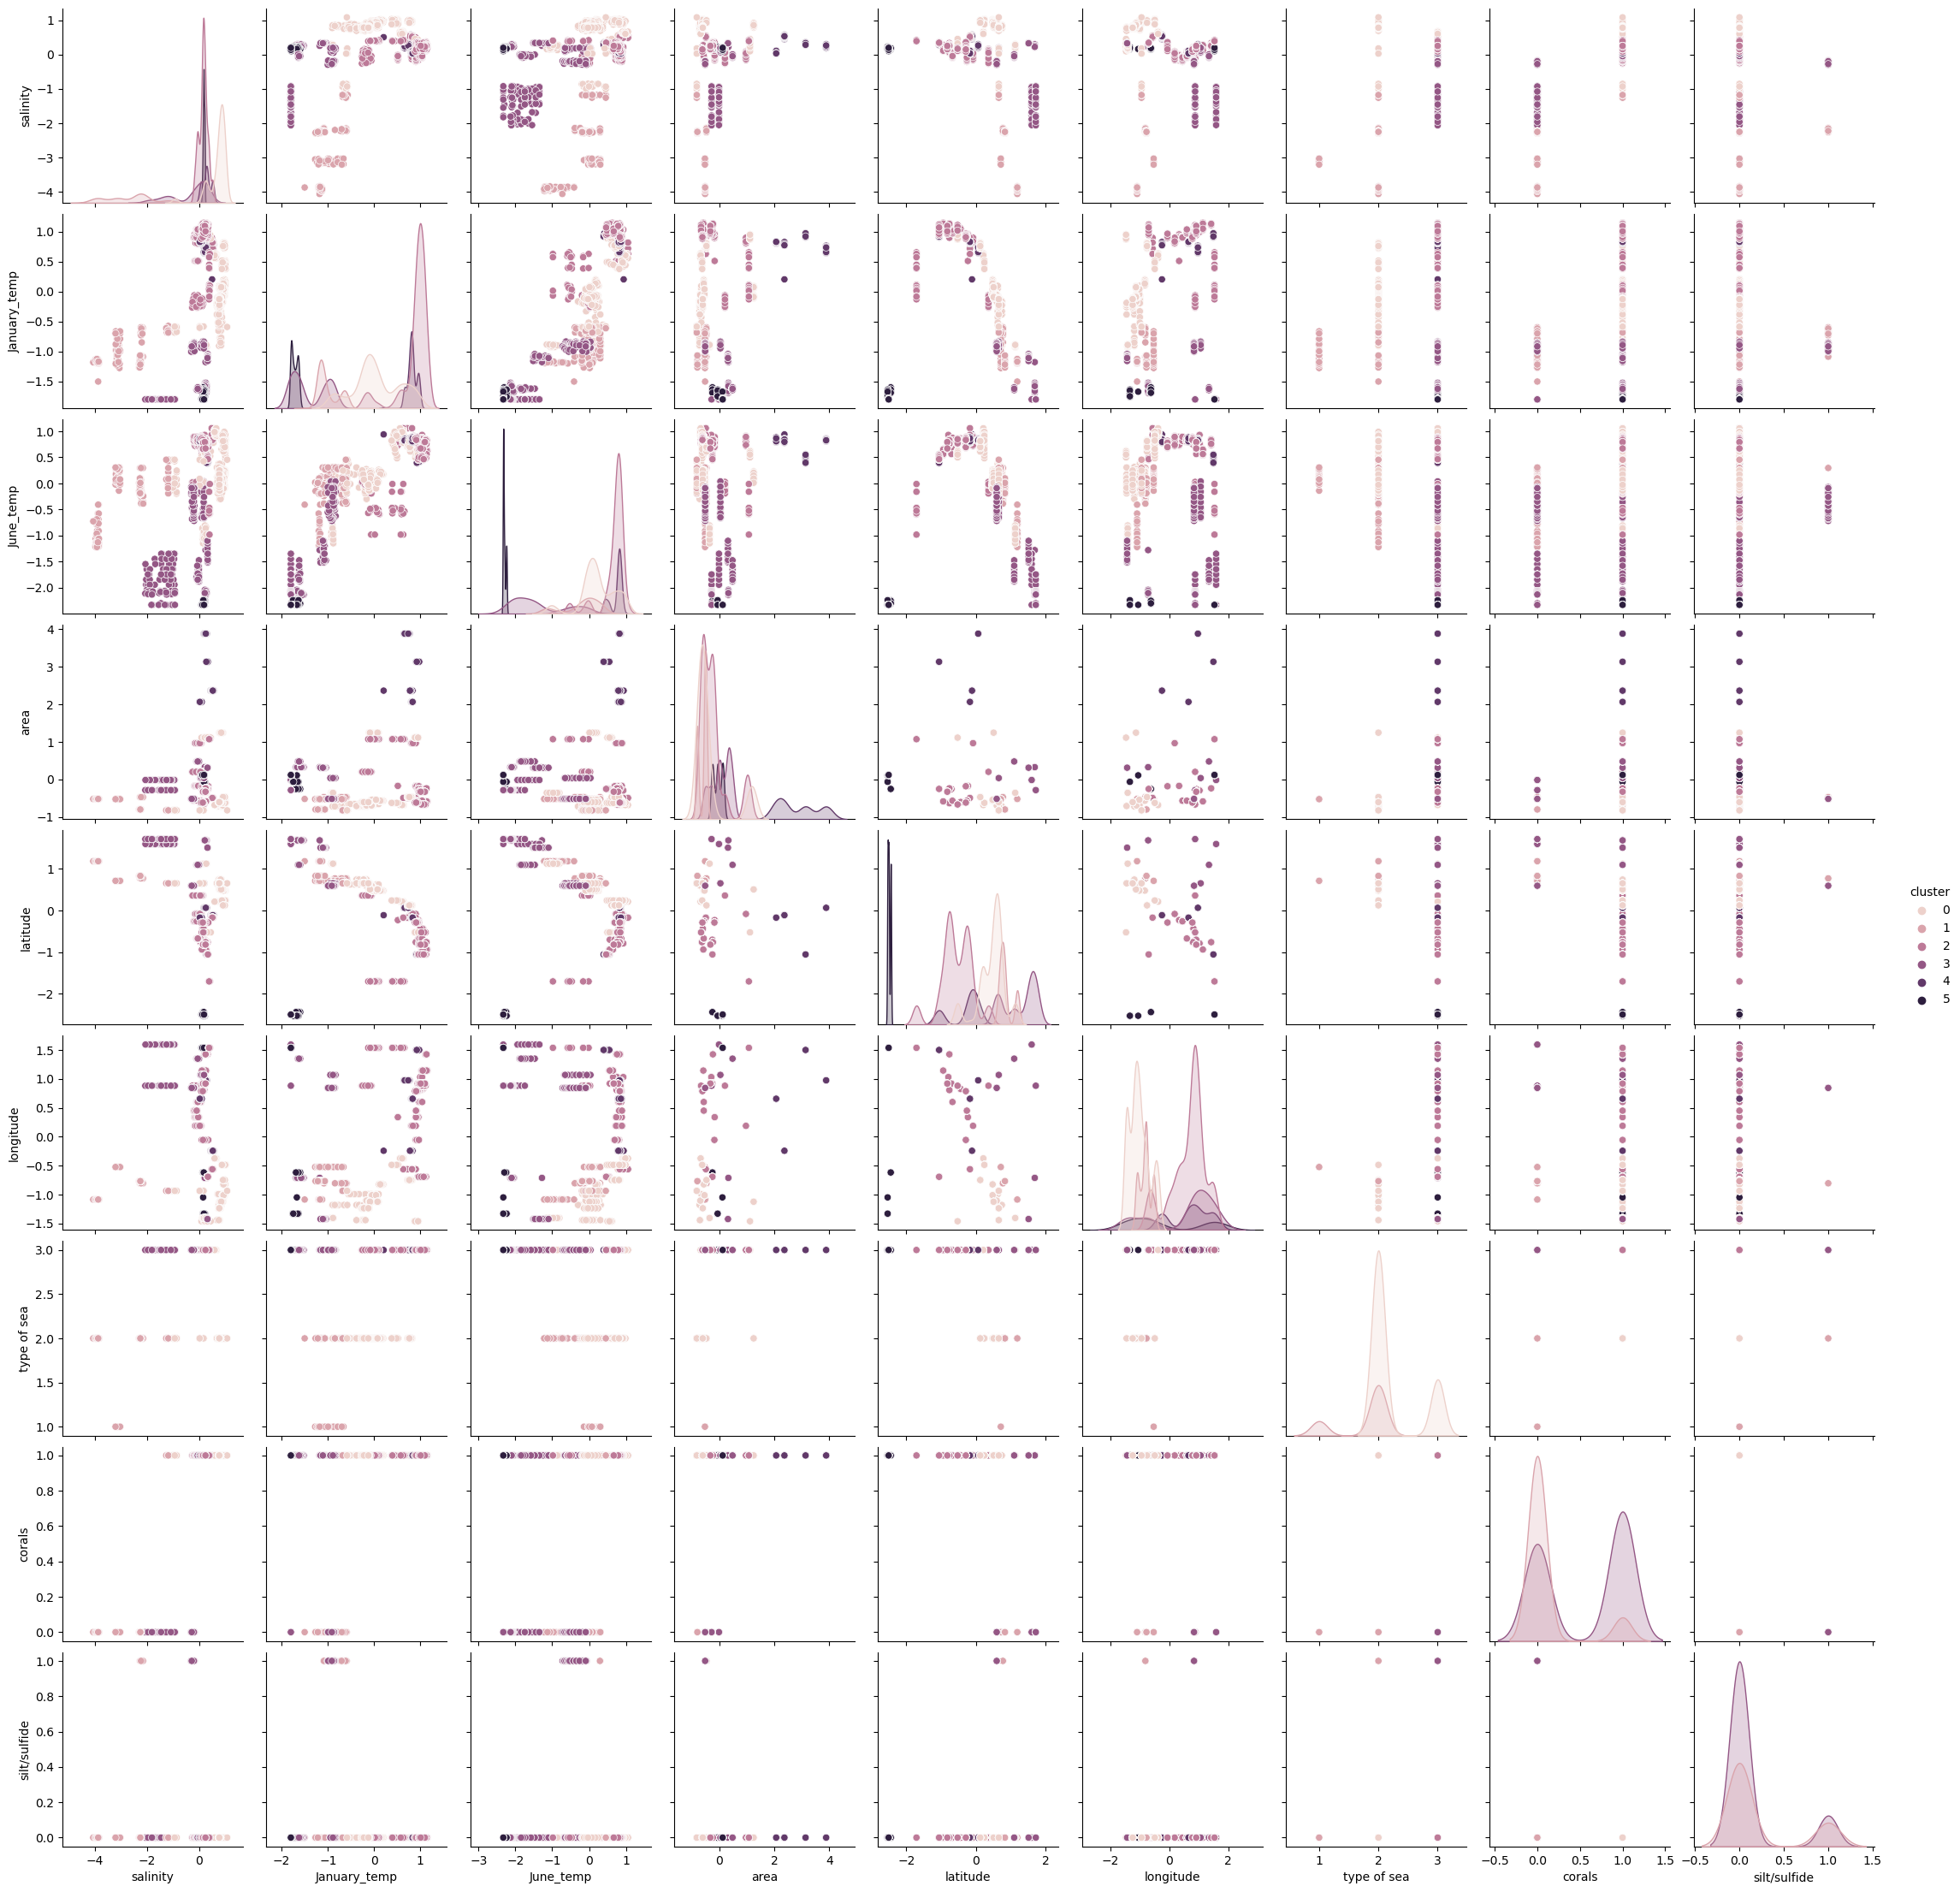

In [19]:
sns.pairplot(df_coral_scaled_predictions, hue="cluster")
plt.show()

#### Visualizing clusters in 2D space

In [20]:
# Plot clusters by salinity and January_temp
cluster_plot_orig = df_coral_scaled_predictions.hvplot.scatter(
    x="salinity",
    y="January_temp",
    by="cluster",
    hover_cols="id"
)
cluster_plot_orig

c:\Users\pfrie\anaconda3\lib\site-packages\holoviews\core\data\pandas.py:221: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  data = [(k, group_type(v, **group_kwargs)) for k, v in


:NdOverlay   [cluster]
   :Scatter   [salinity]   (January_temp)

In [21]:
# Plot clusters by salinity and June_temp
cluster_plot_orig = df_coral_scaled_predictions.hvplot.scatter(
    x="salinity",
    y="June_temp",
    by="cluster",
    hover_cols="id"
)
cluster_plot_orig

c:\Users\pfrie\anaconda3\lib\site-packages\holoviews\core\data\pandas.py:221: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  data = [(k, group_type(v, **group_kwargs)) for k, v in


:NdOverlay   [cluster]
   :Scatter   [salinity]   (June_temp)

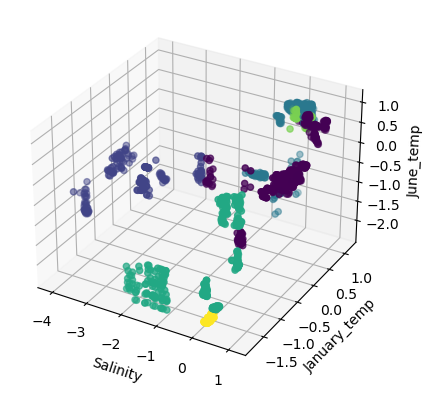

In [22]:
# 3D Visualization (Taking 'salinity', 'January_temp', and 'June_temp' as an example)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_coral_scaled_predictions["salinity"], df_coral_scaled_predictions["January_temp"], df_coral_scaled_predictions["June_temp"], c=df_coral_scaled_predictions["cluster"])
ax.set_xlabel('Salinity')
ax.set_ylabel('January_temp')
ax.set_zlabel('June_temp')
plt.show()

### Cluster with PCA

In [23]:
# Create Primary Components for original dataframe
pca = PCA(n_components=2)
coral_pca_data = pca.fit_transform(df_coral_scaled)
coral_pca_data[:5]

array([[ 0.64543278, -1.44207333],
       [ 0.67601994, -1.39767859],
       [ 0.69215525, -1.37836052],
       [ 0.55567028, -1.52933726],
       [ 0.58250944, -1.48972943]])

In [24]:
# Explained Variance
print(pca.explained_variance_ratio_)

[0.37916789 0.21126117]


In [25]:
# Put PCs into new dataframe
df_coral_pca = pd.DataFrame(coral_pca_data, columns=["PC1", "PC2"])
df_coral_pca.head()

PC1       PC2
0  0.645433 -1.442073
1  0.676020 -1.397679
2  0.692155 -1.378361
3  0.555670 -1.529337
4  0.582509 -1.489729

In [26]:
# Determine best value for k in PCA model using a for loop
k = list(range(1,11))
inertia = []
for i in k:
    model = KMeans(n_clusters=i, random_state=1)
    model.fit(df_coral_pca)
    inertia.append(model.inertia_)

In [27]:
# Put k values and calculated inertia into new dataframe
elbow_data_pca = {"k": k, "inertia": inertia}
elbow_df_pca = pd.DataFrame(elbow_data_pca)
elbow_df_pca.head()

k      inertia
0  1  9285.266481
1  2  4605.206562
2  3  2871.397202
3  4  1925.742952
4  5  1324.125697

In [28]:
# 2D Scatter plot for PCA clusters
elbow_plot_pca = elbow_df_pca.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve - PCA",
    xticks=k
)
elbow_plot_pca

:Curve   [k]   (inertia)

In [29]:
# Create model based on ideal number of clusters
# Use 4 clusters based on elbow curve graph
model = KMeans(n_clusters=4, random_state=1)
model.fit(df_coral_pca)

KMeans(n_clusters=4, random_state=1)

In [30]:
# Determine cluster number for each data point
k_4_pca = model.predict(df_coral_pca)
k_4_pca

array([2, 2, 2, ..., 0, 0, 0])

In [31]:
# Create copy of scaled dataframe to store predictions and add PCA clusters
df_coral_pca_predictions = df_coral_pca.copy()
df_coral_pca_predictions["clusters_pca"] = k_4_pca
df_coral_pca_predictions.head()

PC1       PC2  clusters_pca
0  0.645433 -1.442073             2
1  0.676020 -1.397679             2
2  0.692155 -1.378361             2
3  0.555670 -1.529337             2
4  0.582509 -1.489729             2

In [32]:
# Plot clusters by PC1 and PC2
cluster_plot_pca = df_coral_pca_predictions.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="clusters_pca",
    hover_cols=["id"]
)
cluster_plot_pca

c:\Users\pfrie\anaconda3\lib\site-packages\holoviews\core\data\pandas.py:221: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  data = [(k, group_type(v, **group_kwargs)) for k, v in


:NdOverlay   [clusters_pca]
   :Scatter   [PC1]   (PC2)

### Supervised Learning

In [33]:
# Define input and output values (X and y)
y = coral_df["corals"]
X = coral_df.drop(columns=["corals", "name"])

In [34]:
# View summary of y values in dataset
y.value_counts()

1    2108
0     343
Name: corals, dtype: int64

In [35]:
# Create train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [36]:
# Create and train model on coral dataset
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver="lbfgs")
classifier.fit(X_train, y_train)

LogisticRegression()

In [37]:
# Use model to predict outcome of test set, compare to actuals
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

Prediction  Actual
0           1       1
1           1       1
2           1       1
3           1       1
4           1       1
5           1       1
6           1       1
7           1       1
8           1       1
9           0       0

In [38]:
# Calculate accuracy score of supervised model
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
balanced_accuracy_score(y_test, predictions)

0.9395310108920695

In [39]:
# Review confusion matrix for test dataset
coral_matrix = confusion_matrix(y_test, predictions)
print(coral_matrix)

[[ 74  10]
 [  1 528]]


In [40]:
# Review classification report for test dataset
coral_report = classification_report(y_test, predictions)
print(coral_report)

              precision    recall  f1-score   support

           0       0.99      0.88      0.93        84
           1       0.98      1.00      0.99       529

    accuracy                           0.98       613
   macro avg       0.98      0.94      0.96       613
weighted avg       0.98      0.98      0.98       613

